##**Experiment No-8**

##**AIM: Implement supervised regression techniques on the data using regression algorithms such as linear regression, lasso regression,etc**

##**Theory**

**Linear regression**

Linear regression is the simplest and most widely used statistical technique for predictive modeling. It basically gives us an equation, where we have input features as independent variables, on which our target variable is dependent upon.

Linear regression equation

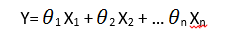

Here, Y as dependent variable , X’s are the independent variables and all thetas are the coefficients. Coefficients are basically the weights assigned to the features, based on their importance.

let us try to understand linear regression with only one feature, i.e., only one independent variable. Therefore our equation becomes,

image.png

This equation is called a simple linear regression equation, which represents a straight line, where ‘Θ0’ is the intercept, ‘Θ1’ is the slope of the line

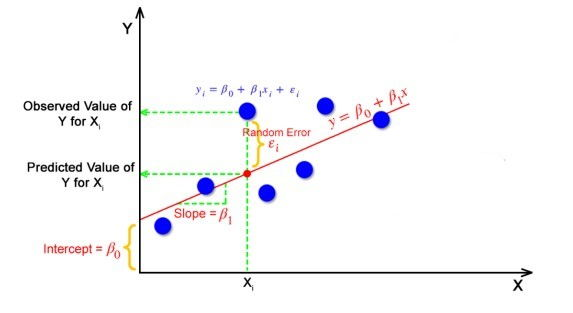

**The Line of Best Fit**

The main purpose of the best fit line is that our predicted values should be closer to our actual or the observed values, because there is no point in predicting values which are far away from the real values. In other words, we tend to minimize the difference between the values predicted by us and the observed values, and which is actually termed as error. Graphical representation of error is as shown below. These errors are also called as residuals. The residuals are indicated by the vertical lines showing the difference between the predicted and actual value.
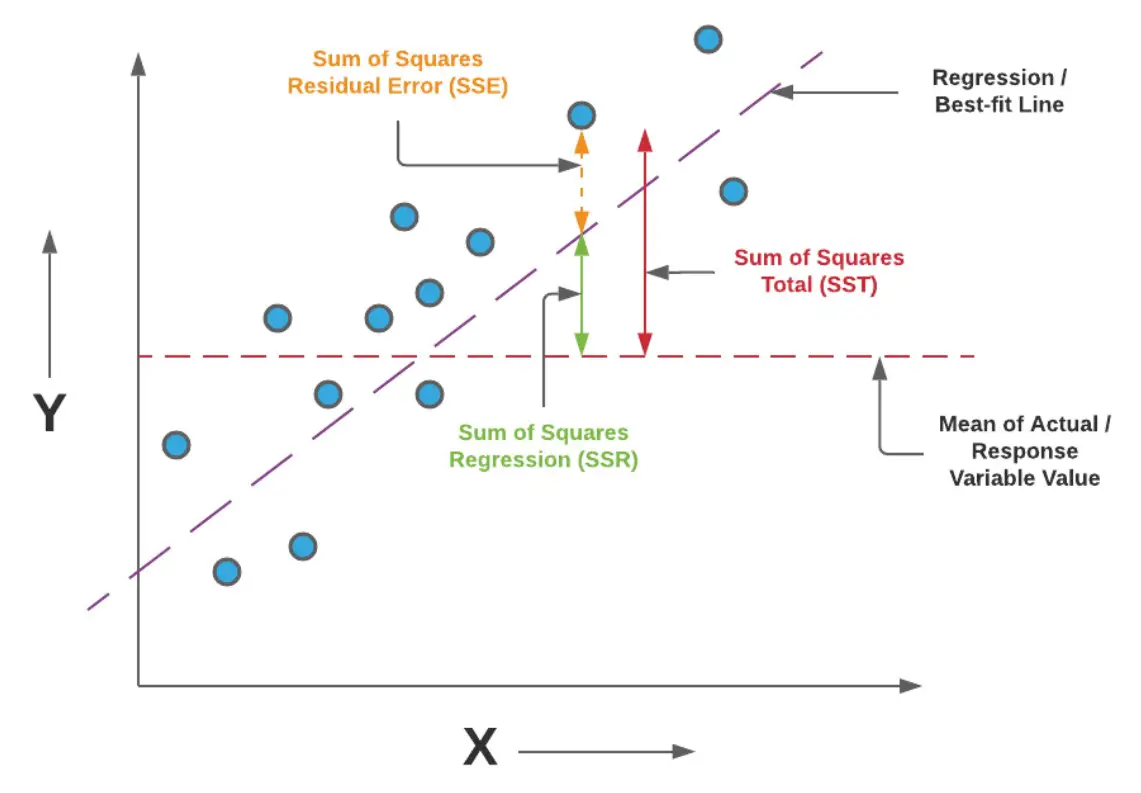

The main main objective is to find out the error and minimize it. But before that, let’s think of how to deal with the first part, that is, to calculate the error. Error is the difference between the value predicted by model and the observed value. Three ways through which we can calculate error:

**Sum of residuals**: (∑(Y – h(X))) – it might result in cancelling out of positive and negative errors.

**Sum of the absolute value of residuals**: (∑|Y-h(X)|) – absolute value would prevent cancellation of errors

**Sum of square of residuals**: ( ∑ (Y-h(X))2) – it’s the method mostly used in practice since here we penalize higher error value much more as compared to a smaller one, so that there is a significant difference between making big errors and small errors, which makes it easy to differentiate and select the best fit line.

Therefore, sum of squares of these residuals is denoted by:

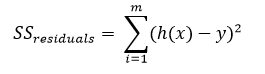

where, h(x) is the predicted value ,  h(x) =Θ1*x +Θ0 , y is the actual values and m is the number of rows in the training set.

**The cost Function**

For the Linear regression model, the cost function will be the minimum of the Root Mean Squared Error of the model, obtained by subtracting the predicted values from actual values. The cost function will be the minimum of these error values.
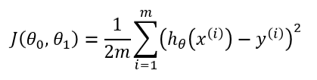

**Regularization**
In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients.
**Methods used for regularization**
1. Ridge Regression
2. Lasso Regression

Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. They work by penalizing the magnitude of coefficients of features and minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalties to the coefficients:

**Ridge Regression:**

*   Performs L2 regularization, i.e., adds penalty equivalent to the square of the magnitude of coefficients
*   Minimization objective = LS Obj + α * (sum of square of coefficients)


**Lasso Regression:** (Least Absolute Shrinkage Selector Operator)


*   Performs L1 regularization, i.e., adds penalty equivalent to the absolute value of the magnitude of coefficients
*   Minimization objective = LS Obj + α * (sum of the absolute value of coefficients)





**Regression Evaluation Metrics**


Here are four common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

**R-Square:**
It determines how much of the total variation in Y (dependent variable) is explained by the variation in X (independent variable). Mathematically, it can be written as:

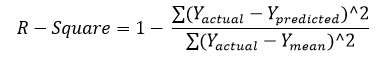

The value of R-square is always between 0 and 1, where 0 means that the model does not model explain any variability in the target variable (Y) and 1 meaning it explains full variability in the target variable.

**Import required libraries and dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/AIR_LAB_DATASETS/LR_data - LR_data.csv')
df

,Unnamed: 0,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...,...
495,495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
df.columns

Index(['Unnamed: 0', 'Email', 'Address', 'Avatar', 'Avg. Session Length',
       'Time on App', 'Time on Website', 'Length of Membership',
       'Yearly Amount Spent'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0','Email','Address','Avatar'],inplace=True)

In [ ]:
df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620146
498,33.322501,12.391423,36.840086,2.336485,456.469510


**Create 'Amount Spent' as target variable 'y' (Dependent variable) and other features as input features 'X' (independent variable)**

In [ ]:
X=df.drop('Yearly Amount Spent',axis=1)
y=df['Yearly Amount Spent']

In [ ]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [ ]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620146
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print(X_train.shape)
print(X_test.shape)


(400, 4)
(100, 4)


**Import Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Print the intercept**

In [ ]:
print(lr.intercept_)

-1044.0723021590923


In [ ]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.413961
Time on App,38.929374
Time on Website,0.448187
Length of Membership,61.524306


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
pred_train_lr= lr.predict(X_train)

print('training data (RMSE):',np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print('training data (r2_score):',r2_score(y_train, pred_train_lr))

training data (RMSE): 9.775371262215339
training data (r2_score): 0.9848506311301156


In [ ]:
pred_test_lr= lr.predict(X_test)
print('test data (RMSE):',np.sqrt(mean_squared_error(y_test,pred_test_lr)))
print('test data (r2_score):',r2_score(y_test, pred_test_lr))

test data (RMSE): 10.538657202735397
test data (r2_score): 0.9819676748625656


**Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rr = Ridge(alpha=1)
rr.fit(X_train, y_train)


Ridge(alpha=1)

In [ ]:
rr_coeff = pd.DataFrame(rr.coef_,X.columns,columns=['Coefficient'])
rr_coeff

,Coefficient
Avg. Session Length,25.351311
Time on App,38.839640
Time on Website,0.445031
Length of Membership,61.376101


In [ ]:
pred_train_rr= rr.predict(X_train)

print('training data (RMSE):',np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print('training data (r2_score):',r2_score(y_train, pred_train_rr))

training data (RMSE): 9.777183196552434
training data (r2_score): 0.9848450145238714


In [ ]:
pred_test_rr= rr.predict(X_test)
print('test data (RMSE):',np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print('test data (r2_score):',r2_score(y_test, pred_test_rr))

test data (RMSE): 10.544848933638876
test data (r2_score): 0.9819464797327371


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
RidgeRegression = Ridge()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, cv=5)
ridgeRegressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [ ]:
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 0.01}
Best score for cost function:  0.9842027783119096


In [ ]:
rr1 = Ridge(alpha=0.01)
rr1.fit(X_train, y_train)

pred_train_rr1= rr1.predict(X_train)

print('training data (RMSE):',np.sqrt(mean_squared_error(y_train,pred_train_rr1)))
print('training data (r2_score):',r2_score(y_train, pred_train_rr1))

training data (RMSE): 9.77537144428618
training data (r2_score): 0.9848506305657875


In [ ]:
pred_test_rr1= rr1.predict(X_test)
print('test data (RMSE):',np.sqrt(mean_squared_error(y_test,pred_test_rr1)))
print('test data (r2_score):',r2_score(y_test, pred_test_rr1))

test data (RMSE): 10.538703021223894
test data (r2_score): 0.9819675180654212


**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
lr_coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
lr_coeff

,Coefficient
Avg. Session Length,25.413961
Time on App,38.929374
Time on Website,0.448187
Length of Membership,61.524306


In [ ]:
pred_train_lasso= model_lasso.predict(X_train)
print('training data (RMSE):',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('training data (r2_score):',r2_score(y_train, pred_train_lasso))

training data (RMSE): 9.775391406266197
training data (r2_score): 0.9848505686936182


In [ ]:
pred_test_lasso= model_lasso.predict(X_test)
print('test data (RMSE):',np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print('test data (r2_score):',r2_score(y_test, pred_test_lasso))

test data (RMSE): 10.539454339440816
test data (r2_score): 0.9819649468543189


In [ ]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

LassoRegression = Lasso()
hyperParameters = {'alpha':[0.0001,0.001,0.01,0.1,1,5,10]}                  #,20,30,35,40,45,50,55,100]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, cv=5)
LassoRegressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]})

In [ ]:
print("Best value for lambda : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for lambda :  {'alpha': 0.1}
Best score for cost function:  0.98420646337266


**Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [ ]:
pred_train_enet= model_enet.predict(X_train)

print('training data (RMSE):',np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print('training data (r2_score):',r2_score(y_train, pred_train_enet))

training data (RMSE): 9.782893539266494
training data (r2_score): 0.9848273068813016


In [ ]:
pred_test_enet= model_enet.predict(X_test)

print('test data (RMSE):',np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print('test data (r2_score):',r2_score(y_test, pred_test_enet))

test data (RMSE): 10.554940414347687
test data (r2_score): 0.9819119085540448
